In [5]:
import pandas as pd
import numpy as np
import seaborn as sbn #sns
import matplotlib.pyplot as mppp #plt

from pandas.plotting import parallel_coordinates # plota baseado nas coordenadas
from sklearn.model_selection import train_test_split #método que SPLITA os dados de treino
from sklearn.tree import DecisionTreeClassifier, plot_tree #árvores de decisão
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
'''
Linear Discriminant Analysis (LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis
(QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest,
a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily
computed, are inherently multiclass, have proven to work well in practice, and have no
hyperparameters to tune.
'''
#> https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods.
#> https://scikit-learn.org/stable/modules/neighbors.html 
from sklearn.neighbors import KNeighborsClassifier 

# C-Support Vector Classification
#> https://scikit-learn.org/stable/modules/svm.html#svm-classification
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression


In [6]:
data = pd.read_csv("../../data/leaves/leaf.csv")
data.head(5)

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [8]:
column_names = ['1_Class-Species',
                '2_Specimen-Number',
                '3_Eccentricity',
                '4_Aspect-Ratio',
                '5_Elongation',
                '6_Solidity',
                '7_Stochastic-Convexity',
                '8_Isoperimetric-Factor',
                '9_Maximal-Indentation-Depth',
                '10_Lobedness',
                '11_Average-Intensity',
                '12_Average-Contrast',
                '13_Smoothness',
                '14_Third-moment',
                '15_Uniformity',
                '16_Entropy'
                ]

data.columns = column_names
data.head(5)

,1_Class-Species,2_Specimen-Number,3_Eccentricity,4_Aspect-Ratio,5_Elongation,6_Solidity,7_Stochastic-Convexity,8_Isoperimetric-Factor,9_Maximal-Indentation-Depth,10_Lobedness,11_Average-Intensity,12_Average-Contrast,13_Smoothness,14_Third-moment,15_Uniformity,16_Entropy
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [9]:
data.describe()

,1_Class-Species,2_Specimen-Number,3_Eccentricity,4_Aspect-Ratio,5_Elongation,6_Solidity,7_Stochastic-Convexity,8_Isoperimetric-Factor,9_Maximal-Indentation-Depth,10_Lobedness,11_Average-Intensity,12_Average-Contrast,13_Smoothness,14_Third-moment,15_Uniformity,16_Entropy
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,18.595870,6.297935,0.719833,2.443060,0.514320,0.903918,0.943627,0.530335,0.037441,0.525379,0.051357,0.124525,0.017675,0.005930,0.000388,1.162592
std,11.128038,3.455939,0.208619,2.602353,0.195599,0.114723,0.115176,0.217220,0.038591,1.040791,0.036018,0.051936,0.013775,0.005302,0.000432,0.585718
min,1.000000,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,9.000000,3.000000,0.550125,1.211100,0.349815,0.890475,0.965790,0.345725,0.009694,0.017105,0.022801,0.083106,0.006860,0.002075,0.000102,0.718310
50%,15.000000,6.000000,0.767220,1.572500,0.502140,0.947830,0.992980,0.579060,0.023879,0.103780,0.042051,0.119200,0.014009,0.004441,0.000239,1.073400
75%,29.000000,9.000000,0.895125,2.343900,0.633445,0.976870,1.000000,0.698760,0.047858,0.416855,0.073051,0.163900,0.026160,0.008348,0.000520,1.557150
max,36.000000,16.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


In [9]:
data.groupby('1_Class-Species').size()

1_Class-Species
1     11
2     10
3     10
4      8
5     12
6      8
7     10
8     11
9     14
10    13
11    16
12    12
13    13
14    12
15    10
22    12
23    11
24    13
25     9
26    12
27    11
28    12
29    12
30    12
31    11
32    11
33    11
34    11
35    11
36    10
dtype: int64

In [11]:
# abordagem estratificada hold-out para repartir o dataset em train/test
train, test = train_test_split(data, test_size = 0.4, stratify = data['1_Class-Species'], random_state = 42)

## 3. Análise exploratória

> Visualização com matplotlib e seaborn

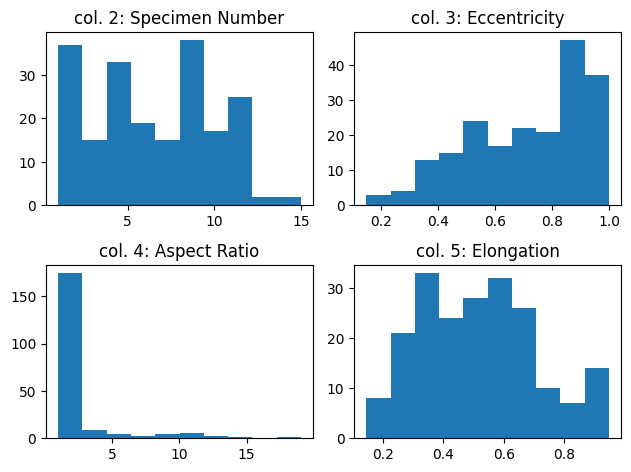

In [14]:
n_bins = 10
fig, axs = mppp.subplots(2, 2) #plt

axs[0,0].hist(train['2_Specimen-Number'], bins = n_bins);
axs[0,0].set_title('col. 2: Specimen Number');

axs[0,1].hist(train['3_Eccentricity'], bins = n_bins);
axs[0,1].set_title('col. 3: Eccentricity');

axs[1,0].hist(train['4_Aspect-Ratio'], bins = n_bins);
axs[1,0].set_title('col. 4: Aspect Ratio');

axs[1,1].hist(train['5_Elongation'], bins = n_bins);
axs[1,1].set_title('col. 5: Elongation');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

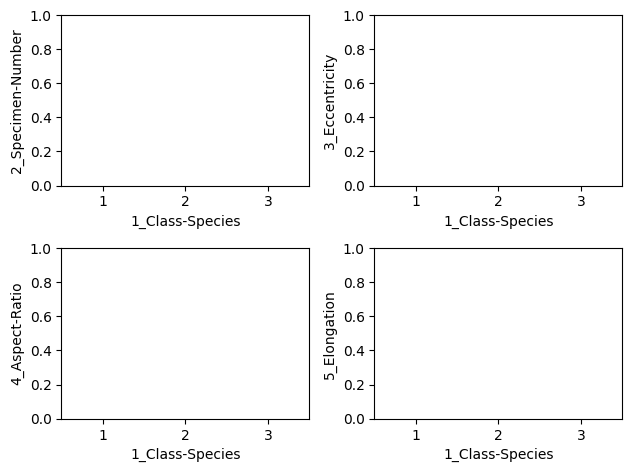

In [28]:
fig, axs = mppp.subplots(2, 2)
fn = ['2_Specimen-Number','3_Eccentricity','4_Aspect-Ratio','5_Elongation']
cn = ['1', '2', '3']
# '1: Quercus Suber', '2: Salix atrocinera', '3: Populus nigra'

#sns = sbn
sbn.boxplot(x = '1_Class-Species', y = '2_Specimen-Number', data = train, order = cn, ax = axs[0,0]);
sbn.boxplot(x = '1_Class-Species', y = '3_Eccentricity', data = train, order = cn, ax = axs[0,1]);
sbn.boxplot(x = '1_Class-Species', y = '4_Aspect-Ratio', data = train, order = cn, ax = axs[1,0]);
sbn.boxplot(x = '1_Class-Species', y = '5_Elongation', data = train, order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

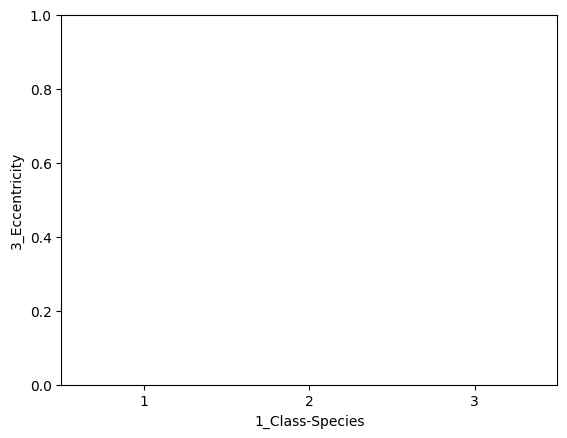

In [29]:
sbn.violinplot(x="1_Class-Species", y="3_Eccentricity", data=train, size=5, order = cn, palette = 'colorblind');